64000
MAX:19803,MIN:-19803
MAX:1646270.7132192764,MIN:1738.8021432259893


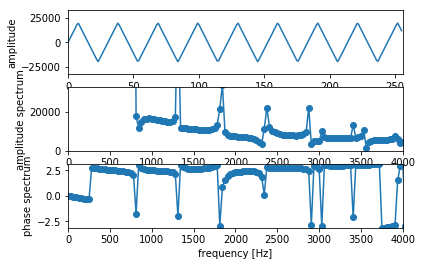

In [27]:
#coding:utf-8
import wave
import numpy as np
from pylab import *

def dft (start, x, N):
    """xのstartサンプル目からのNサンプルを周期波形とみなしたDFT値を返す"""
    X = [0.0] * N
    for k in range(N):
        for n in range(N):
            real = np.cos(2 * np.pi * k * n / N)
            imag = - np.sin(2 * np.pi * k * n / N)
            X[k] += x[start + n] * complex(real, imag)
    return X

if __name__ == "__main__" :
    wf = wave.open("triangle.wav" , "r" )
    fs = wf.getframerate()  # サンプリング周波数
    x = wf.readframes(wf.getnframes())#binary
    x = frombuffer(x, dtype= "int16") #/ 32768.0  # -1 - +1に正規化した波形
    print(len(x))
    print("MAX:{0},MIN:{1}".format(max(x),min(x)))
    wf.close()

    start = 0        # サンプリングする開始位置
    N = 256          # サンプル数
    X = dft(start, x, N)    # 離散フーリエ変換
    freqList = [k * fs / N for k in range(N)]    # 周波数のリスト
    amplitudeSpectrum = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in X]    # 振幅スペクトル np.abs()
    print("MAX:{0},MIN:{1}".format(max(amplitudeSpectrum),min(amplitudeSpectrum)))
    phaseSpectrum = [np.arctan2(int(c.imag), int(c.real)) for c in X]      # 位相スペクトル np.angle()

    # 波形サンプルを描画
    subplot(311)  # 3行1列のグラフの1番目の位置にプロット
    plot(range(start, start+N), x[start:start+N])
    axis([start, start+N, -32768.0, 32768.0])
    xlabel("time [sample]")
    ylabel("amplitude")

    # 振幅スペクトルを描画
    subplot(312)
    plot(freqList, amplitudeSpectrum, marker='o', linestyle='-')
    axis([0, fs/2, 0, 32768])    # ナイキスト周波数まで表示すれば十分
    xlabel("frequency [Hz]")
    ylabel("amplitude spectrum")

    # 位相スペクトルを描画
    subplot(313)
    plot(freqList, phaseSpectrum, marker='o', linestyle='-')
    axis([0, fs/2, -np.pi, np.pi])
    xlabel("frequency [Hz]")
    ylabel("phase spectrum")

    show()